In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
###problem statement
predicting the newyork taxifare data

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv",nrows=5000)

In [4]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
345,44:00.0,36.5,2011-05-04 13:44:00 UTC,-73.873068,40.774183,-73.978847,40.762062,5
824,55:00.0,7.7,2010-09-26 01:55:00 UTC,-73.995700,40.764427,-73.992148,40.744787,2
4660,12:57.0,12.0,2013-06-25 19:12:57 UTC,-73.972015,40.765480,-73.990055,40.744908,3
2504,35:00.0,4.1,2012-06-30 14:35:00 UTC,-74.005650,40.736715,-73.999745,40.738560,1
2215,24:00.0,6.1,2009-03-27 22:24:00 UTC,-73.985355,40.760933,-73.982747,40.775540,5
4036,43:00.0,5.7,2010-04-23 00:43:00 UTC,-73.988818,40.734603,-73.997853,40.746072,1
2778,30:16.0,6.7,2009-09-15 18:30:16 UTC,-73.985316,40.747449,-74.002334,40.733677,1
2496,15:18.0,7.3,2009-06-27 17:15:18 UTC,-73.988809,40.745253,-73.973665,40.738119,1
4706,02:57.0,37.0,2015-04-23 22:02:57 UTC,-73.942833,40.790199,-73.940781,40.674770,2
3121,43:00.0,9.7,2011-11-16 13:43:00 UTC,-73.962150,40.779097,-73.981937,40.773165,5


In [5]:
df.head

<bound method NDFrame.head of      unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0      26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1      52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2      35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3      30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4      51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   
...        ...     ...                      ...                  ...   
4995   45:32.0     6.5  2010-09-04 12:45:32 UTC           -73.980622   
4996   53:52.0     4.9  2011-06-13 10:53:52 UTC           -73.956664   
4997   26:40.0     7.5  2013-12-12 21:26:40 UTC           -73.988707   
4998   01:00.0     7.7  2010-03-08 14:01:00 UTC           -73.952795   
4999   37:41.0    13.3  2011-02-28 18:37:41 UTC           -73.983301   

      latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0              40.721319          

In [6]:
df.shape

(5000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             5000 non-null   object 
 1   amount                5000 non-null   float64
 2   date_time_of_pickup   5000 non-null   object 
 3   longitude_of_pickup   5000 non-null   float64
 4   latitude_of_pickup    5000 non-null   float64
 5   longitude_of_dropoff  5000 non-null   float64
 6   latitude_of_dropoff   5000 non-null   float64
 7   no_of_passenger       5000 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,11.296238,-72.426826,39.867237,-72.426130,39.875767,1.631000
std,9.710106,10.722381,6.351342,10.722293,6.326084,1.257122
min,-2.900000,-74.438233,-73.991840,-74.429332,-73.979010,0.000000
25%,6.000000,-73.992449,40.734045,-73.991349,40.734379,1.000000
50%,8.500000,-73.982069,40.752128,-73.980196,40.753512,1.000000
75%,12.500000,-73.967040,40.766890,-73.963589,40.767636,2.000000
max,180.000000,40.751582,41.366138,40.758867,41.032598,6.000000


In [9]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [10]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
## Data Analysis
the given data is regression,because the given task of predicting a continuous quantity

<AxesSubplot:xlabel='amount', ylabel='count'>

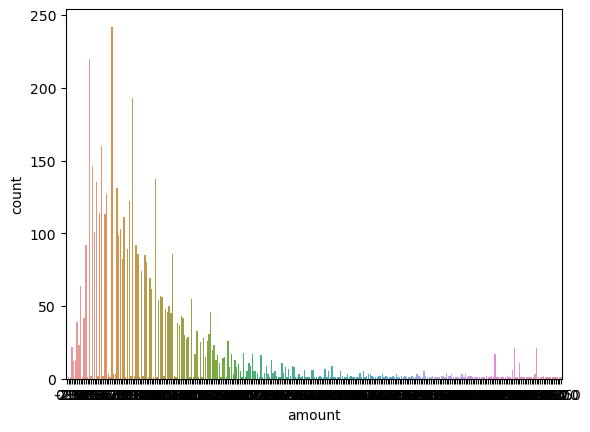

In [232]:
sns.countplot(x="amount",data=df)

<AxesSubplot:xlabel='amount', ylabel='longitude_of_pickup'>

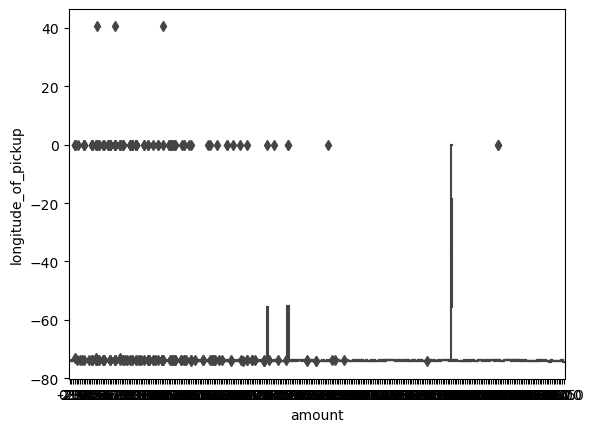

In [235]:
sns.boxplot(x="amount",y="longitude_of_pickup",data=df)

In [11]:
df=pd.get_dummies(df,columns=["unique_id"])

In [12]:
df=pd.get_dummies(df,columns=["date_time_of_pickup"])

In [13]:
df.sample(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,unique_id_00:00.0,unique_id_00:01.0,unique_id_00:02.0,unique_id_00:07.0,...,date_time_of_pickup_2015-06-26 04:00:58 UTC,date_time_of_pickup_2015-06-26 06:54:20 UTC,date_time_of_pickup_2015-06-26 07:03:51 UTC,date_time_of_pickup_2015-06-27 02:56:01 UTC,date_time_of_pickup_2015-06-27 12:20:45 UTC,date_time_of_pickup_2015-06-27 13:12:00 UTC,date_time_of_pickup_2015-06-27 22:06:57 UTC,date_time_of_pickup_2015-06-28 19:50:21 UTC,date_time_of_pickup_2015-06-29 20:37:21 UTC,date_time_of_pickup_2015-06-30 22:42:39 UTC
2058,13.00,-73.985229,40.768650,-73.994705,40.741325,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4702,9.50,-74.004639,40.741638,-73.993332,40.762203,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4154,9.70,-73.993468,40.752362,-73.966420,40.755857,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,33.83,-73.973305,40.756386,-73.872444,40.774307,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1512,5.50,-73.983995,40.768815,-73.985765,40.777082,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,7.30,-73.994009,40.761440,-73.972811,40.792574,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
632,8.90,-73.989130,40.756668,-73.961070,40.757225,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,4.50,-73.981020,40.737760,-73.980668,40.730497,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,15.07,-73.961933,40.795585,-73.962253,40.764817,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1627,13.70,-73.990040,40.757154,-74.009117,40.740486,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
duplicate=df.duplicated()


print(duplicate.sum())

0


In [55]:
df.dtypes

amount                                         float64
longitude_of_pickup                            float64
latitude_of_pickup                             float64
longitude_of_dropoff                           float64
latitude_of_dropoff                            float64
                                                ...   
date_time_of_pickup_2015-06-27 13:12:00 UTC      uint8
date_time_of_pickup_2015-06-27 22:06:57 UTC      uint8
date_time_of_pickup_2015-06-28 19:50:21 UTC      uint8
date_time_of_pickup_2015-06-29 20:37:21 UTC      uint8
date_time_of_pickup_2015-06-30 22:42:39 UTC      uint8
Length: 6994, dtype: object

In [ ]:
## LINEAR REGRESSION
linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables 

In [57]:
x=df.drop(["amount"],axis=1)

In [58]:
y=df[["amount"]]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [60]:
model_1=LinearRegression()

In [61]:
model_1.fit(x_train,y_train)

LinearRegression()

In [62]:
model_1.score(x_test,y_test)

-2873053.0342767616

In [63]:
model_1.score(x_train,y_train)

1.0

In [84]:
from sklearn.model_selection import cross_val_score

In [93]:
v=cross_val_score(model_1,x_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [94]:
np.mean(v)

-1537670.9193117179

In [96]:
reg_pred=model_1.predict(x_test)

In [127]:
reg_pred

array([[ 91302.16123203],
       [ 51753.09974649],
       [ 91219.72867661],
       ...,
       [ 91281.10752238],
       [ 80348.66476316],
       [122545.78386211]])

In [ ]:
## KNEIGHBORSREGRESSOR

In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
classifier=KNeighborsRegressor(11)

In [102]:
classifier.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [103]:
y_pred=classifier.predict(x_test)

In [105]:
y_pred

array([[13.41818182],
       [14.        ],
       [13.38181818],
       ...,
       [13.41818182],
       [13.12727273],
       [13.38181818]])

In [104]:
print(mean_squared_error(y_test,y_pred))

80.3092887168044


In [107]:
classifier=KNeighborsRegressor(5)

In [108]:
classifier.fit(x_train,y_train)

KNeighborsRegressor()

In [109]:
y_pred=classifier.predict(x_test)

In [110]:
y_pred

array([[17.26],
       [11.96],
       [11.96],
       ...,
       [17.26],
       [11.96],
       [11.96]])

In [111]:
print(mean_squared_error(y_test,y_pred))

82.76712026666665


In [122]:
classifier=KNeighborsRegressor(95)

In [123]:
classifier.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=95)

In [124]:
y_pred=classifier.predict(x_test)

In [125]:
y_pred

array([[11.80568421],
       [12.65442105],
       [12.41231579],
       ...,
       [11.77621053],
       [11.59621053],
       [12.47126316]])

In [126]:
print(mean_squared_error(y_test,y_pred))

75.25080011282733


In [ ]:
## SUPPORT VECTOR REGRESSION

In [128]:
from sklearn.svm import SVR

In [132]:
model_2=SVR().fit(x_train,y_train)

In [133]:
model_2

SVR()

In [139]:
y_pred=model_2.predict(x_test)

In [140]:
y_pred

array([8.48807419, 8.68357657, 8.48804134, ..., 8.48805784, 8.35185039,
       8.48796183])

In [141]:
print(mean_squared_error(y_test,y_pred))

81.36344095145441


In [ ]:
###DECISION TREE REGRESSOR

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
model_3 = DecisionTreeRegressor(max_depth=2)

In [144]:
model_3

DecisionTreeRegressor(max_depth=2)

In [145]:
model_3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [146]:
model_3.score(x_train,y_train)

0.37140644768192166

In [147]:
model_3.score(x_test,y_test)

-0.0849901057713518

In [148]:
model_4 = DecisionTreeRegressor(max_depth=5)
model_4

DecisionTreeRegressor(max_depth=5)

In [150]:
model_4.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [151]:
model_4.score(x_train,y_train)

0.7162199543458225

In [152]:
model_4.score(x_test,y_test)

-46.37314094427068

In [153]:
model_5 = DecisionTreeRegressor(max_depth=19)

In [154]:
model_5

DecisionTreeRegressor(max_depth=19)

In [155]:
model_5.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=19)

In [156]:
model_5.score(x_train,y_train)

0.9377085134648229

In [157]:
model_5.score(x_test,y_test)

-36.18520782779369

In [ ]:
## BAGGING REGRESSOR

In [162]:
from sklearn.ensemble import BaggingRegressor

In [163]:
model_6=BaggingRegressor()

In [164]:
model_6.fit(x_train,y_train)

BaggingRegressor()

In [165]:
model_6.score(x_train,y_train)

0.955838696560374

In [166]:
model_6.score(x_test,y_test)

-17.07320213273574

In [167]:
model_7=BaggingRegressor(n_estimators=60)

In [168]:
model_7.fit(x_train,y_train)

BaggingRegressor(n_estimators=60)

In [170]:
model_7.score(x_train,y_train)

0.9587285118571454

In [171]:
model_7.score(x_test,y_test)

-12.977241448040468

In [172]:
model_8=BaggingRegressor(n_estimators=85)

In [173]:
model_8.fit(x_train,y_train)

BaggingRegressor(n_estimators=85)

In [174]:
model_8.score(x_train,y_train)

0.9617387030522108

In [175]:
model_8.score(x_test,y_test)

-16.82737448675322

In [ ]:
## ADA BOOSTING REGRESSOR

In [176]:
from sklearn.ensemble import AdaBoostRegressor

In [177]:
model_9=AdaBoostRegressor()

In [178]:
model_9.fit(x_train,y_train)

AdaBoostRegressor()

In [179]:
model_9.score(x_train,y_train)

-0.9128768095814384

In [180]:
model_9.score(x_test,y_test)

-5.570058434461063

In [181]:
model_10=AdaBoostRegressor(n_estimators=60)

In [182]:
model_10.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=60)

In [183]:
model_10.score(x_train,y_train)

0.5373008373617625

In [184]:
model_10.score(x_test,y_test)

-0.5140087958743982

In [ ]:
## GRADIENT BOOSTING REGRESSOR

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

In [186]:
model_11=GradientBoostingRegressor()

In [187]:
model_11.fit(x_train,y_train)

GradientBoostingRegressor()

In [188]:
model_11.score(x_train,y_train)

0.8094093401960635

In [189]:
model_11.score(x_test,y_test)

-11.0459623794091

In [197]:
model_12=GradientBoostingRegressor(max_depth=8)

In [198]:
model_12.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=8)

In [199]:
model_12.score(x_train,y_train)

0.9561862052562529

In [200]:
model_12.score(x_test,y_test)

-27.762674454446667

In [ ]:
## RANDOM FOREST REGRESSOR

In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
model_13=RandomForestRegressor()

In [203]:
model_13.fit(x_train,y_train)

RandomForestRegressor()

In [204]:
model_13.score(x_train,y_train)

0.9571676446938477

In [205]:
model_13.score(x_test,y_test)

-16.716946620431862

In [206]:
model_14=GradientBoostingRegressor(max_depth=7)

In [207]:
model_14.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=7)

In [208]:
model_14.score(x_train,y_train)

0.9438761852233725

In [209]:
model_14.score(x_test,y_test)

-27.111143934016287

In [210]:
model_15=GradientBoostingRegressor(max_depth=25)

In [211]:
model_15.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=25)

In [212]:
model_15.score(x_train,y_train)

0.9984849635112237

In [213]:
model_15.score(x_test,y_test)

-32.10850780882516

In [ ]:
## RANDOM FOREST REGRESSOR

In [214]:
from sklearn.ensemble import RandomForestRegressor

In [215]:
model_16=RandomForestRegressor()

In [216]:
model_16.fit(x_train,y_train)

RandomForestRegressor()

In [217]:
model_16.score(x_train,y_train)

0.9561983202217226

In [218]:
model_16.score(x_test,y_test)

-16.940803097408544

In [222]:
model_17=RandomForestRegressor(max_depth=10)

In [223]:
model_17.fit(x_train,y_train)

RandomForestRegressor(max_depth=10)

In [224]:
model_17.score(x_train,y_train)

0.8384396711091198

In [225]:
model_17.score(x_test,y_test)

-15.755075756311609

In [227]:
model_18=RandomForestRegressor(max_depth=25)

In [229]:
model_18.fit(x_train,y_train)

RandomForestRegressor(max_depth=25)

In [230]:
model_18.score(x_train,y_train)

0.9095126390615293

In [231]:
model_18.score(x_test,y_test)

-17.896253848440477

In [ ]:
##  predicting data after regression
knn regression-mean_square_data=80.3092887168044
support vector regressor-mean_square_data=81.36344095145441
decision tree regressor-traindata-0.37140644768192166 and testdata--0.0849901057713518
bagging regressor-traindata-0.955838696560374 and testdata--17.07320213273574
Ada Boosting traindata-0.5373008373617625 and testdata--0.5140087958743982
Gradient Boosting traindata-0.9984849635112237 and testdata--32.10850780882516
Random Forest Regressor traindata-0.8384396711091198 and testdata--15.755075756311609

In [ ]:
By Predicting The data its good to use Decision tree regressor because it is a supervised machine learning algorithm